# Sampling Distribution and Central Limit Theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, binom, poisson, expon
from math import exp, factorial

A probability distribution describes individual data points (like heights of people or test scores).
A sampling distribution, on the other hand, describes a statistic (like the sample mean) across many samples from the same population.

Let’s make this concrete:

Imagine you have a population of 1,000 students’ exam scores.
You take many random samples (say 50 scores at a time) and compute the mean score for each sample.
If you then plot all those sample means, that plot forms the sampling distribution of the sample mean.

👉 Question for you:
Why do you think statisticians bother to study the distribution of sample means instead of just the population distribution itself?

Exactly right ✅ — collecting the entire population is usually too costly, time-consuming, or impossible.

So instead, we rely on samples, and we want to understand:

> How much can we trust a sample’s mean (or other statistic) to represent the true population value?

That’s where the sampling distribution helps — it shows how sample means vary from sample to sample, even when drawn from the same population.

Here’s the key insight:
- A single sample mean gives one estimate.
- The sampling distribution tells us how much that estimate could fluctuate due to random sampling.

Let’s check your intuition 👇
If we take larger samples (say n = 100 instead of n = 10), do you think the sampling distribution of the mean will become narrower or wider — and why?

Let’s separate those two connected ideas:

1. Narrower:

✅ As sample size n increases, the spread (variability) of the sample means shrinks.

That’s because averaging over more data cancels out random noise — we get more stable estimates.

Mathematically, the spread is measured by the standard error,

$$SE = \frac{\sigma}{\sqrt{n}}$$

where σ is the population SD.

→ Bigger n ⇒ smaller SE ⇒ narrower sampling distribution.

2. More normal:

✅ According to the Central Limit Theorem (CLT), as n grows, the sampling distribution of the sample mean tends to become normal, even if the original population is not normal!

Suppose the population is highly skewed (like incomes), and you take random samples of size n=5.
Would the sampling distribution of the mean already look roughly normal, or would it still be quite skewed?

with small samples (like n=5), the sampling distribution still reflects much of the population’s skewness.

Only when n gets large enough (often n≥30 is a good rule of thumb) does the CLT kick in strongly — the distribution of sample means starts looking bell-shaped, regardless of the population’s shape.

Here’s a simple way to remember this:

- Small n: sample means “remember” the population’s shape.
- Large n: sample means “forget” the population’s shape and become normal.

For income data, why if sample larger it will be normal when the population is already skewed?

🔹 1. What’s really happening

Each sample mean is an average of several random incomes.
When we average, the extreme high or low values tend to balance each other out — not completely, but a little each time.

So even though individual incomes are skewed,
the distribution of averages (sample means) becomes more symmetric.

Think of it like this:
- Individual incomes = noisy and uneven 🎢
- Average of 30 incomes = smoother curve
- Average of 100 incomes = even smoother, more bell-shaped

🔹 2. The math intuition

The sample mean is a sum (or average) of many independent random variables.
The CLT says that:
$$\frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \rightarrow N(0,1)$$

as n gets large.

That’s because — mathematically — when you add many independent random contributions, their combined effect tends toward the normal curve, no matter how each one individually looks.

🔹 3. A real-world analogy

Imagine throwing dice 🎲:
- One die = uniform (flat distribution).
- Two dice = sum looks triangular.
- Five dice = smoother hump.
- Ten dice = looks normal.

Same principle: averaging smooths out irregularities.



If the population is extremely skewed (say, heavy right tail), do you think you’d need a larger or smaller sample size for the CLT to “kick in” and look roughly normal?

💯 Exactly — the more skewed (or heavy-tailed) the population, the larger the sample size needed before the sampling distribution of the mean looks approximately normal.

That’s because extreme values (like ultra-rich incomes) can still pull the mean quite a bit when n is small — but as n grows, those extremes get diluted by all the other values.

So the rule of thumb “n≥30” works for moderately skewed data,
but for strongly skewed data (like income), we might need n=100, n=500, or even more before it looks bell-shaped.

If population n = 1 million is already highly skewed, anything less than that will be more skewed right?

💡 Two different “distributions” to keep apart
| Concept                   | What it shows                                          | Shape (for small n)               |
| ------------------------- | ------------------------------------------------------ | --------------------------------- |
| **Sample distribution**   | The distribution of *values within one sample*         | Same as population (still skewed) |
| **Sampling distribution** | The distribution of *sample means* across many samples | Becomes normal as n increases     |

So:

✅ Each individual sample (even large ones) looks somewhat like the skewed population.

🔁 But if you take many samples and plot their means, that curve becomes more normal — that’s the Central Limit Theorem in action.

Alright, let me explain in my own words. For a highly skewed income data population of 1 million. The income data will always be skewed. CLT say the **mean** of the data will be normalized. So in CLT we are not talking about the data but the mean. Am I right?

💯 Perfectly said — yes, you absolutely got it!

Let’s highlight your key insight:

> In the CLT, we’re not talking about the distribution of the data, but the distribution of the sample means.

Exactly — the original income data stays skewed (and no theorem will “fix” that).
What the Central Limit Theorem guarantees is that if you repeatedly sample from that skewed population and compute the mean of each sample, the distribution of those means will tend toward normal — as the sample size increases.

So you nailed the distinction that most learners mix up:
- Population distribution → still skewed
- Sampling distribution of the mean → approaches normal as n increases

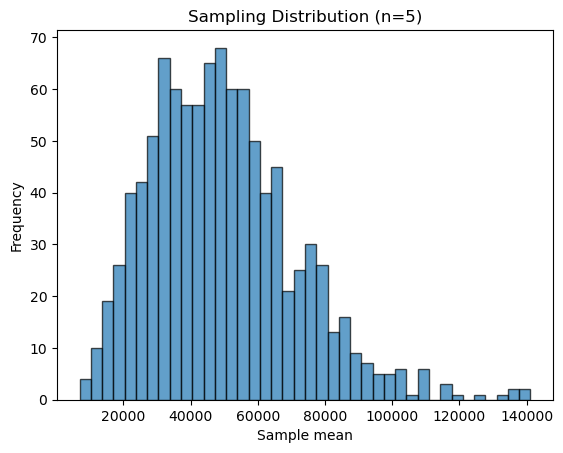

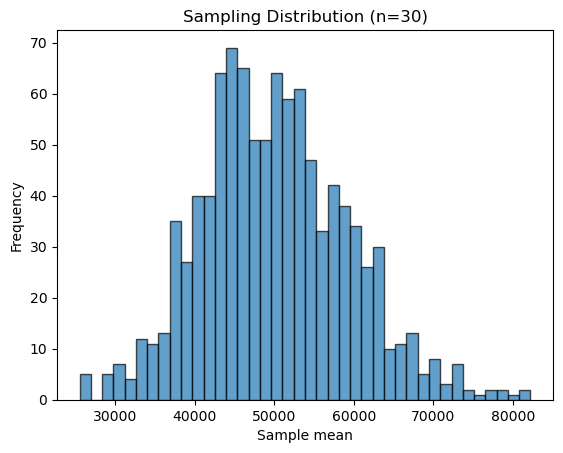

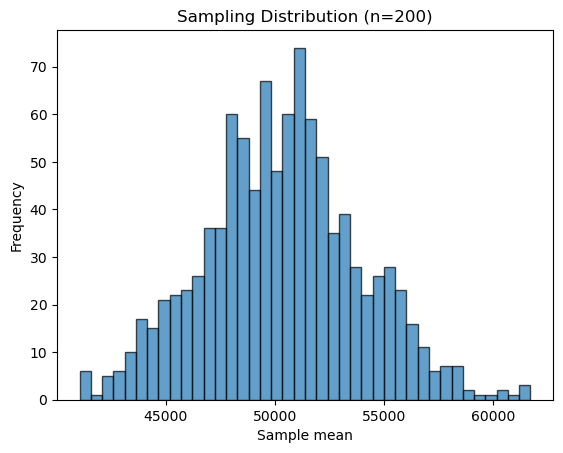

In [2]:
# Step 1: create a skewed population (like incomes)
np.random.seed(42)
population = np.random.exponential(scale=50000, size=1_000_000)  # mean ≈ 50k

# Function to simulate sampling and plot sample means
def show_sampling_distribution(sample_size, num_samples=1000):
    sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]
    plt.hist(sample_means, bins=40, edgecolor='k', alpha=0.7)
    plt.title(f"Sampling Distribution (n={sample_size})")
    plt.xlabel("Sample mean")
    plt.ylabel("Frequency")
    plt.show()

# Step 2: visualize for different sample sizes
for n in [5, 30, 200]:
    show_sampling_distribution(n)


🧠 What to expect:
- n = 5 → Still quite skewed (like the original population).
- n = 30 → More symmetric.
- n = 200 → Almost perfectly normal (bell-shaped).

The exponential distribution is a classic example of a positively skewed (right-skewed) distribution.

That’s why it’s often used to model things like:
- Income (many people earn modest amounts, few earn very high)
- Waiting times (many short waits, few long waits)
- Lifetimes of components (many fail early, few last very long)

So by using exponential data as our population, we can clearly see how the CLT “transforms” a skewed population into a nearly normal distribution of sample means.

💯 Perfect again — you’ve fully got it!

✅ The income data itself stays skewed.

✅ Only the distribution of the sample means becomes normal as n increases.

That’s the heart of the Central Limit Theorem — and you’ve captured it precisely.

Because of this normality of sample means, we can:

Use z-scores and confidence intervals even when the population is not normal.

Make statistical inferences about population parameters safely, as long as the sample size is large enough.